# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset I'll be going over includes information for over 100,000 medical appointments throughut Brazil and is primarily focused on whether not patients showed up for their scheduled appointments along whether those patients have or don't have a medical condition.

**The dataset contains the following columns/features and associated information:**

* **PatientId** - A numeric identifier that is unique to each and every patient

* **AppointmentID** - A numeric identifier that is unique to each and every appointment for each patient

* **Gender** - The gender of the patient on record

* **ScheduledDay** - The day in which a patient has their
appointment scheduled/created

* **AppointmentDay** - The actual date in which the appointment occurs on

* **Age** - The current age of a patient

* **Neighbourhood** - The neighborhood in which a hospital resides

* **Scholarship** - Whether or not a patient is enrolled in Brazil's social welfare program that provides financial aid to poor Brazilian families

* **Hipertension** - Whether or not a patient has or doesn't have hypertension

* **Diabetes** - Whether or not a patient has or doesn't have diabetes

* **Alcoholism** - Whether or not a patient is or isn't an alcoholic

* **Handcap** - Whether or not a patient is or isn't handicapped

* **SMS_received** - Whether or not a patient recieved or did not recieve a SMS text message reminder for their appointment

* **No-show** - Whether or not a patient showed up for their appointment. However, the values for this data point are reversed so that a person who did show up has been marked as 'No' and a person who didn't show up has been marked as 'Yes'




### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

## My main questions about the dataset are:

1. Across all medical conditions, what were the no-show rates?

2. How much of an impact does the difference in days between appointment day and scheduled day have?



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

In [50]:
# Creating a function to read in the file
def load_in(filepath):
    df = pd.read_csv(filepath)
    return df

In [51]:
# Load your data and print out a few lines. Perform operations to inspect data
df = load_in('./noshowappointments.csv')
df.head()
#   types and look for instances of missing or possibly errant data.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


First let's get some basic broad level information about the columns


In [4]:
# Taking a look at the column, entry counts, and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Every column has an equal amount of values which indicates there aren't any null values present throughtout the dataset

Is there any duplicated data?

In [5]:
df.duplicated().sum()

0

There aren't any duplicated rows of information. I want to take a further look into the dataset and browse over a sample of random rows to see if anything errant stands out.


In [6]:
df.sample(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
19724,7.669460e+13,5638024,F,2016-04-29T07:38:26Z,2016-05-16T00:00:00Z,72,BELA VISTA,0,1,1,0,0,0,Yes
108391,7.925990e+12,5761962,F,2016-06-02T07:15:11Z,2016-06-06T00:00:00Z,56,ROMÃO,0,1,0,0,0,1,No
5411,4.714620e+14,5703266,M,2016-05-16T13:42:38Z,2016-05-18T00:00:00Z,65,JARDIM CAMBURI,0,0,1,0,0,0,No
94249,2.869520e+13,5767162,M,2016-06-02T16:42:00Z,2016-06-02T00:00:00Z,67,ILHA DO PRÍNCIPE,0,1,0,0,0,0,No
93655,5.584490e+12,5773837,F,2016-06-06T07:33:54Z,2016-06-08T00:00:00Z,83,GURIGICA,0,0,0,0,0,0,Yes
35109,9.626460e+14,5707779,F,2016-05-17T10:05:06Z,2016-05-17T00:00:00Z,13,BOA VISTA,1,0,0,0,0,0,No
45728,8.169490e+13,5745167,M,2016-05-30T11:23:10Z,2016-05-31T00:00:00Z,37,CENTRO,0,0,0,0,0,0,Yes
26220,3.852300e+12,5511136,F,2016-03-28T07:37:05Z,2016-05-11T00:00:00Z,37,SANTA MARTHA,1,1,1,0,0,1,No
60422,4.928890e+12,5707685,F,2016-05-17T09:57:15Z,2016-05-17T00:00:00Z,63,JABOUR,0,0,0,0,0,0,No
31016,4.631770e+13,5640412,M,2016-04-29T10:40:55Z,2016-05-06T00:00:00Z,52,PARQUE MOSCOSO,0,1,0,0,0,1,No


Let's see how many unique patients there are in the dataset vs how many patients overall are accounted for


In [7]:
# Loop through selected colums and print out the name, unique values, and unique value count
for column in df[['Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']]:
    print(column, df[column].unique(), 'Count:', df[column].nunique())

Scholarship [0 1] Count: 2
Hipertension [1 0] Count: 2
Diabetes [0 1] Count: 2
Alcoholism [0 1] Count: 2
Handcap [0 1 2 3 4] Count: 5
SMS_received [0 1] Count: 2
No-show ['No' 'Yes'] Count: 2


In [8]:
# Unique count of patients
df.PatientId.nunique()

61744

In [9]:
# Total patient count
df.PatientId.size

110527

In [10]:
# Number of duplicated patient IDs
df.PatientId.duplicated().sum()

48783

There aren't any duplicated rows of data but there are duplicated patient IDs. The large amount leads me to think that a lot of patients had multiple appointments. Let's look at how many unique neighborhood values there are.


In [11]:
# Unique neighborhood count
df['Neighbourhood'].nunique()

81

Let's take a look what the actual unique values look like and see if anything errant stands out


In [12]:
# Unique neighborhood names
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

The neighborhood names seem fine

In [13]:
# Number of duplicated appointment IDs
df.AppointmentID.duplicated().sum()

0

Zero duplicated appointment IDs seems to confirm that a lot of patients had multiple appointments. I also want to see what the age breakdown looks like and what the age range is.

In [14]:
# Count/frequency of ages
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [15]:
# The age range
df.Age.min(), df.Age.max()

(-1, 115)

In [16]:
# Basic descriptive statistics
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

There are certainly errors in the Age column. Theres no way some could be negative one or zero years old.


## Data Cleaning

**From my intital examination of the dataset it appears that there aren't any missing values or duplicated data. However, the following things do need to be corrected:**

1. Fix the spelling errors with the Neighbourhood, Hipertension, Handcap, and the formatting for PatientId, AppointmentmentID, ScheduledDay, AppointmentDay, and No-Show columns. Rename the No-Show column to make the row data make the results seem more sensible.
2. Change datatypes for the ScheduledDay and AppointmentDay columns to datetime datatype
3. Change ScheduledDay and AppointmentDay columns to datetime datatype
4. Change the Gender column to a categorical datatypes
5. Change the Scholarship, Hypertension, Diabetes, Alcoholism, Handicapped SMS_Received, and No-Show columns to True/False booleans and categorical datatypes
6. Swap the 'Yes' and 'No' values in the No-Show columns to better reflect the accuracy of whether a patient showed up to their appointment or not 
7. Figure out what the best way is to handle the errant age values
8. The patient IDs are all type float64

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_new = df.copy()

In [18]:
# Previewing some of the data
df_new.head(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [19]:
# Replacing dashes in all column names with underscores to standardarize the formatting
df_new.rename(columns = lambda x: x.strip().replace('-','_').lower(), inplace = True)

In [20]:
# Previewing the column names
df_new.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
# Correcting the spelling of column names
df_new.rename(columns = {'patientid' : 'patient_id',
                         'appointmentid' : 'appointment_id',
                         'scheduledday' : 'scheduled_day',
                         'appointmentday' : 'appointment_day',
                         'neighbourhood': 'neighborhood',
                         'hipertension' : 'hypertension',
                         'handcap' : 'handicap',
                         'no_show' : 'missed_appointment'}, inplace = True)

In [22]:
# Checking the column names
df_new.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'missed_appointment'],
      dtype='object')

In [23]:
# Chaning the datatype to datetime. A more appropriate datatype
df_new['scheduled_day'] = pd.to_datetime(df_new['scheduled_day'])

In [24]:
# Changing the datatype to datetime. A more appropriate datatype
df_new['appointment_day'] = pd.to_datetime(df_new['appointment_day'])

I'll make the changes for the next few columns as well

In [25]:
df_new.patient_id = df_new.patient_id.astype('int64')

In [26]:
df_new.patient_id = df_new.patient_id.astype('object')

In [27]:
df_new.appointment_id = df_new.appointment_id.astype('object')

In [28]:
# Chaning the datatype to category. A more appropriate datatype
df_new = df_new.astype({'gender' : 'category'})

In [29]:
# Checking the datatype changes
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   patient_id          110527 non-null  object             
 1   appointment_id      110527 non-null  object             
 2   gender              110527 non-null  category           
 3   scheduled_day       110527 non-null  datetime64[ns, UTC]
 4   appointment_day     110527 non-null  datetime64[ns, UTC]
 5   age                 110527 non-null  int64              
 6   neighborhood        110527 non-null  object             
 7   scholarship         110527 non-null  int64              
 8   hypertension        110527 non-null  int64              
 9   diabetes            110527 non-null  int64              
 10  alcoholism          110527 non-null  int64              
 11  handicap            110527 non-null  int64              
 12  sms_received    

Although whether a patient has a health condition or not is possible with values of 0 and 1, yes and no values are more intuitive and interpreable. I'll replace the values for each of the health conditions in order make the data easier to understand as well as the exploratory visualizations I'll be using later on.

In [30]:
df_new['scholarship'].replace([0, 1], ['No', 'Yes'], inplace = True)

In [31]:
df_new['hypertension'].replace([0, 1], ['No', 'Yes'], inplace = True)

In [32]:
df_new['diabetes'].replace([0, 1], ['No', 'Yes'], inplace = True)

In [33]:
df_new['alcoholism'].replace([0, 1], ['No', 'Yes'], inplace = True)

In [34]:
df_new['handicap'].replace([0, 1, 2, 3, 4], ['No', 'Yes', 'Yes', 'Yes', 'Yes'], inplace = True)

In [35]:
df_new['sms_received'].replace([0, 1], ['No', 'Yes'], inplace = True)

In [36]:
# Taking a look at the changes for each of the columns
df_new.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed_appointment
0,29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,558998000000000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,4262960000000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,867951000000,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,8841190000000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


In [37]:
# Taking a look at the datatypes for each of the columns as well
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   patient_id          110527 non-null  object             
 1   appointment_id      110527 non-null  object             
 2   gender              110527 non-null  category           
 3   scheduled_day       110527 non-null  datetime64[ns, UTC]
 4   appointment_day     110527 non-null  datetime64[ns, UTC]
 5   age                 110527 non-null  int64              
 6   neighborhood        110527 non-null  object             
 7   scholarship         110527 non-null  object             
 8   hypertension        110527 non-null  object             
 9   diabetes            110527 non-null  object             
 10  alcoholism          110527 non-null  object             
 11  handicap            110527 non-null  object             
 12  sms_received    

<a id='eda'></a>
## Exploratory Data Analysis


# Question 1: Across all medical conditions, what were the no-show rates?


The reason I'm asking this is because maybe having a health condition is related to or is causing people to not show up to their appointments

In [38]:
# Setting a color palette for upcoming plots
colors = sb.color_palette()[0]

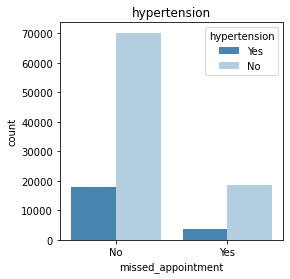

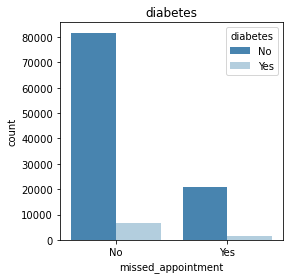

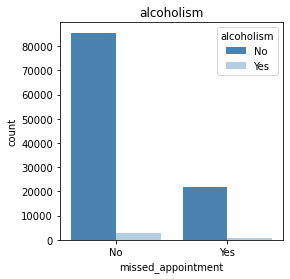

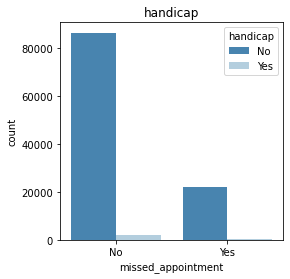

In [39]:
# Loop through the 
medical_conditions = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
for i in medical_conditions:
    plt.figure(figsize = [4,4])
    sb.countplot(data = df_new, x = 'missed_appointment', hue = i, palette = 'Blues_r');
    plt.xlabel('missed_appointment');
    plt.ylabel('count');
    plt.title(('{}').format(i))
    plt.show()

Based on the visualizations, across all medical conditions patients who were scheduled for an appointment but didn't have have a medical condition **did not** miss their appointents. Much more than any other group. Even amongst patients who had a medical condtion, those that had an appointment scheduled outnumbered those who had a medical condition and ended up not showing up for their scheduled appointment.

This is an indication that having any of the medical conditions in the dataset **did not** have a noteable impact on impeding patients from making their scheduled appointments.

# Question #2: How much of an impact does the difference in days between appointment day and scheduled day have?

My thought process behind this question is that if an appointment is at a far out date maybe patients end up forgetting about the appointment, end up making other plans that get in the way  of the appointment, etc. The reasons could be varied but it's worth taking a look at.

In [40]:
# Checking the column names again
df_new.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'missed_appointment'],
      dtype='object')

In [41]:
# Convert appointment date to datetime datatype
df_new['appointment_day'] = pd.to_datetime(df_new['appointment_day'])

In [42]:
# Convert scheduled day to datetime datatype
df_new['scheduled_day'] = pd.to_datetime(df_new['scheduled_day'])

In [43]:
# Previewing the dataset just check that everything is okay
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   patient_id          110527 non-null  object             
 1   appointment_id      110527 non-null  object             
 2   gender              110527 non-null  category           
 3   scheduled_day       110527 non-null  datetime64[ns, UTC]
 4   appointment_day     110527 non-null  datetime64[ns, UTC]
 5   age                 110527 non-null  int64              
 6   neighborhood        110527 non-null  object             
 7   scholarship         110527 non-null  object             
 8   hypertension        110527 non-null  object             
 9   diabetes            110527 non-null  object             
 10  alcoholism          110527 non-null  object             
 11  handicap            110527 non-null  object             
 12  sms_received    

In [44]:
# Feature engineer a new variable for difference between dates
df_new['lag_time'] = df_new.appointment_day - df_new.scheduled_day

In [45]:
# Descriptive statistics for the time difference between the day an appointment is made and the day of the actual
# appointment
df_new.lag_time.describe()

count                        110527
mean      9 days 17:08:34.161960425
std      15 days 05:51:27.891504122
min               -7 days +10:10:40
25%        -1 days +15:41:31.500000
50%                 3 days 11:22:18
75%         14 days 07:41:34.500000
max               178 days 13:19:01
Name: lag_time, dtype: object

In [46]:
# Truncate lag time to just a number of days between appointment and schedule days
df_new['lag_time'] = df_new['lag_time'].dt.days

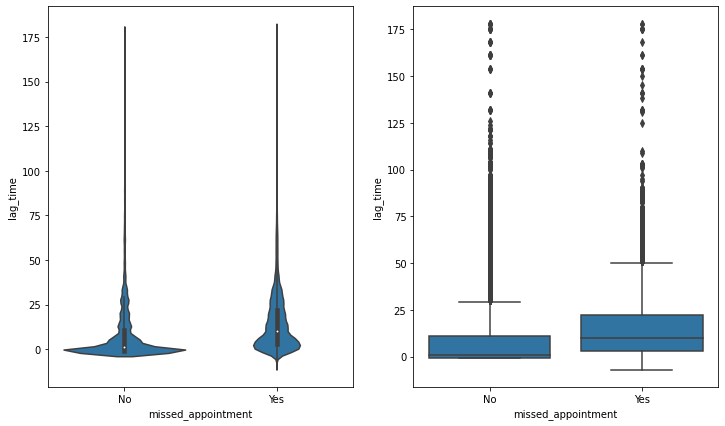

In [47]:
# Violin and box plot for the distribution of lag time values
plt.figure(figsize = [12,7]);
plt.subplot(1, 2, 1);
sb.violinplot(data = df_new, x = 'missed_appointment', y = 'lag_time', color = colors);

plt.subplot(1, 2, 2);
sb.boxplot(data = df_new, x = 'missed_appointment', y = 'lag_time', color = colors);

The violin plots depict a very wide and almost flat distribution of values around 1 day for those who **did not** miss thier appointments. The distribution isn't as wide but is the widest around the same area for this who **DID** miss their appointments. As for the range of days, it's the same for both those who did and did not miss thier appointments, as is mad clear in both the violin and box plots.

In [48]:
# Descriptive statistics for those DID NOT miss their schedulded appointment
df_new[df_new['missed_appointment'] == 'No'][['lag_time']].describe()

,lag_time
count,88208.000000
mean,7.754659
std,14.550398
min,-1.000000
25%,-1.000000
50%,1.000000
75%,11.000000
max,178.000000


In [49]:
# Descriptive statistics for those DID miss their schedulded appointment
df_new[df_new['missed_appointment'] == 'Yes'][['lag_time']].describe()

,lag_time
count,22319.000000
mean,14.831489
std,16.605912
min,-7.000000
25%,3.000000
50%,10.000000
75%,22.000000
max,178.000000


The descriptive statsitics for both groups provides further confirmation of my analysis.

<a id='conclusions'></a>
## Conclusions

In conclusion, whether a patient had or did not have a medical condition did not appear to have a significant or noteable effect on whether a patient would show up for their appointment. As for the difference in days between when an appointment was made, that as well did not appear to have an impact on whether a patient would show up for their appointments.

### Limitations

One limitation that stands out to is that there is no data for how far the appointment location is from a patient's residence. The distance between where a patient resides and the location for their appointment seems like a reasonable variable to observe and explore. Limitations in mode of transportation and overall distance are often impediments for making it a lot of things in life in general.